# Global Power Plant Database Project
Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database.

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
country_long (text): longer form of the country designation
name (text): name or title of the power plant, generally in Romanized form
gppd_idnr (text): 10 or 12 character identifier for the power plant
capacity_mw (number): electrical generating capacity in megawatts
latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
primary_fuel (text): energy source used in primary electricity generation or export
other_fuel1 (text): energy source used in electricity generation or export
other_fuel2 (text): energy source used in electricity generation or export
other_fuel3 (text): energy source used in electricity generation or export
commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
owner (text): majority shareholder of the power plant, generally in Romanized form
source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url (text): web document corresponding to the source field
geolocation_source (text): attribution for geolocation information
wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
year_of_capacity_data (number): year the capacity information was reported
generation_data_source (text): attribution for the reported generation information
generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 201 7
Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Predictions:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Global Power Plant Database.csv')
data.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [5]:
data.shape

(907, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [8]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [10]:
data.shape

(907, 27)

In [11]:
data.nunique().to_frame("Unique Values")

Unique Values
country                               1
country_long                          1
name                                907
gppd_idnr                           907
capacity_mw                         361
latitude                            836
longitude                           827
primary_fuel                          8
other_fuel1                           3
other_fuel2                           1
other_fuel3                           0
commissioning_year                   73
owner                               280
source                              191
url                                 304
geolocation_source                    3
wepp_id                               0
year_of_capacity_data                 1
generation_gwh_2013                   0
generation_gwh_2014                 371
generation_gwh_2015                 396
generation_gwh_2016                 403
generation_gwh_2017                 408
generation_gwh_2018                 410
generation_gwh_2019                   0
generation_data_source                1
estimated_generation_gwh              0

In [12]:
print(data.shape)
data.head()

(907, 27)


country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [13]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

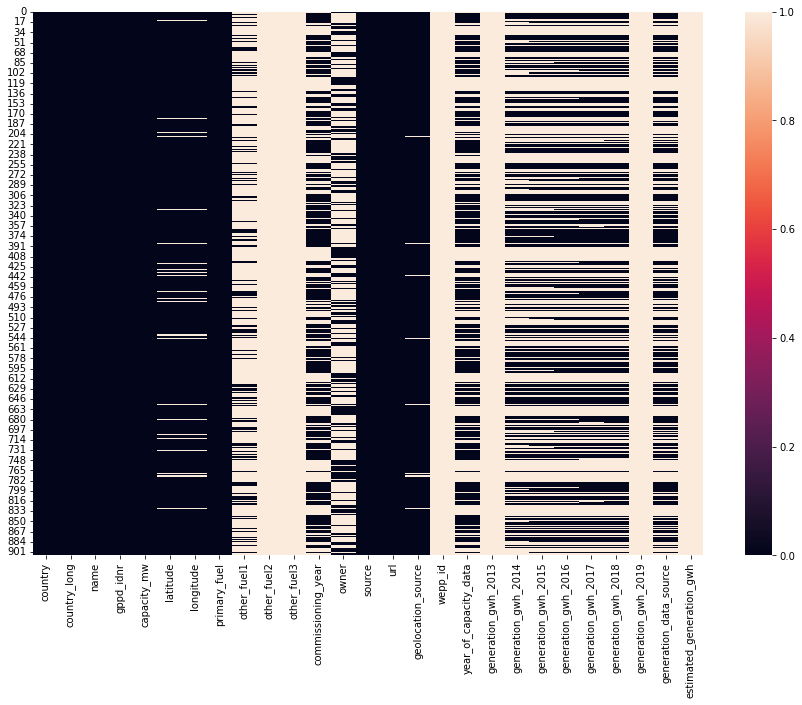

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())
plt.show()

In [15]:
object_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']


In [16]:
data.drop(columns = ['other_fuel2', 'other_fuel3','wepp_id','estimated_generation_gwh'], axis = 1, inplace = True)

In [17]:
data

country country_long                                               name  \
0       IND        India                                   ACME Solar Tower   
1       IND        India                                ADITYA CEMENT WORKS   
2       IND        India                           AES Saurashtra Windfarms   
3       IND        India                                        AGARTALA GT   
4       IND        India                                       AKALTARA TPP   
5       IND        India                                       AKRIMOTA LIG   
6       IND        India                                             ALIYAR   
7       IND        India                                    ALLAIN DUHANGAN   
8       IND        India                                        ALMATTI DAM   
9       IND        India                                        AMAR KANTAK   
10      IND        India                                      AMARAVATI TPP   
11      IND        India                             ANANDPUR SAHIB ST-I&II   
12      IND        India                                        ANAPARA "C"   
13      IND        India                                             ANDHRA   
14      IND        India                                  ANOOPGARH ST I&II   
15      IND        India                                             ANPARA   
16      IND        India                                            ANTA GT   
17      IND        India                                            ANUPPUR   
18      IND        India                                         ANUPUR TPP   
19      IND        India                                  ARVINDNAGAR SUGAR   
20      IND        India                                    ASHOKNAGAR MILL   
21      IND        India                                       ATHANI SUGAR   
22      IND        India                                         AURAIYA GT   
23      IND        India                                AVANTHA BHANDAR TPP   
24      IND        India                               AWARPUR CEMENT PLANT   
25      IND        India                                           Abhijeet   
26      IND        India                          Amarsar Solar Power Plant   
27      IND        India                                  Anabura Wind Farm   
28      IND        India                Ananthapur - Meil Solar Power Plant   
29      IND        India                              Andrha Lake Wind Farm   
30      IND        India                               Anikkadavu Wind Farm   
31      IND        India                             Arasinagundi Wind Farm   
32      IND        India                 Askandra - DREPL Solar Power Plant   
33      IND        India  Askandra - Electromech Maritech Solar Power Plant   
34      IND        India              Askandra - Finehope Solar Power Plant   
35      IND        India                 Askandra - Khaya Solar Power Plant   
36      IND        India                Askandra - Newton Solar Power Plant   
37      IND        India               Askandra - Saidham Solar Power Plant   
38      IND        India                Askandra - Vasavi Solar Power Plant   
39      IND        India                                           BADARPUR   
40      IND        India                                       BAGALKOT ICP   
41      IND        India                                       BAGLIHAR HEP   
42      IND        India                                    BAGLIHAR HEP-II   
43      IND        India                                         BAIRA SIUL   
44      IND        India                                          BAKRESWAR   
45      IND        India                                          BALCO TPP   
46      IND        India                                           BALIMELA   
47      IND        India                               BALLARPUR BILT POWER   
48      IND        India                                     BAMANIA CEMENT   
49      IND        India                              

In [18]:
data.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  861.000000  861.000000          527.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.239612    4.939316           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   16.773900   74.256200         1988.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.512400   79.440800         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count                  519.0                  0.0           398.000000   
mean                  2019.0                  NaN          2431.823590   
std                      0.0                  NaN          4026.440035   
min                   2019.0                  NaN             0.000000   
25%                   2019.0                  NaN           223.557672   
50%                   2019.0                  NaN           801.123775   
75%                   2019.0                  NaN          3035.306250   
max                   2019.0                  NaN         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           422.000000           434.000000           440.000000   
mean           2428.226946          2467.936859          2547.759305   
std            4194.596959          4162.884308          4196.991169   
min               0.000000             0.000000             0.000000   
25%             176.381063           188.285252           177.874930   
50%             711.181225           737.205450           817.977250   
75%            3084.121250          3282.861313          3275.690475   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  generation_gwh_2019  
count           448.000000                  0.0  
mean           2600.804099                  NaN  
std            4314.880456                  NaN  
min               0.000000                  NaN  
25%             193.378250                  NaN  
50%             751.644375                  NaN  
75%            3143.535900                  NaN  
max           35136.000000                  NaN

In [19]:
data.drop(columns = ['year_of_capacity_data'], inplace = True)

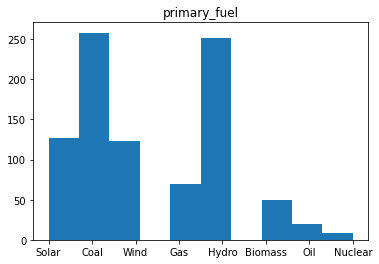

In [20]:
#HISTOGRAM

data['primary_fuel'].hist(grid = False)
plt.title('primary_fuel')
plt.show()

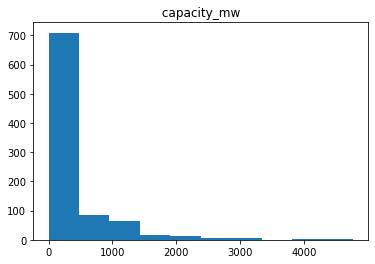

In [21]:
#HISTOGRAM

data['capacity_mw'].hist(grid = False)
plt.title(' capacity_mw ')
plt.show()

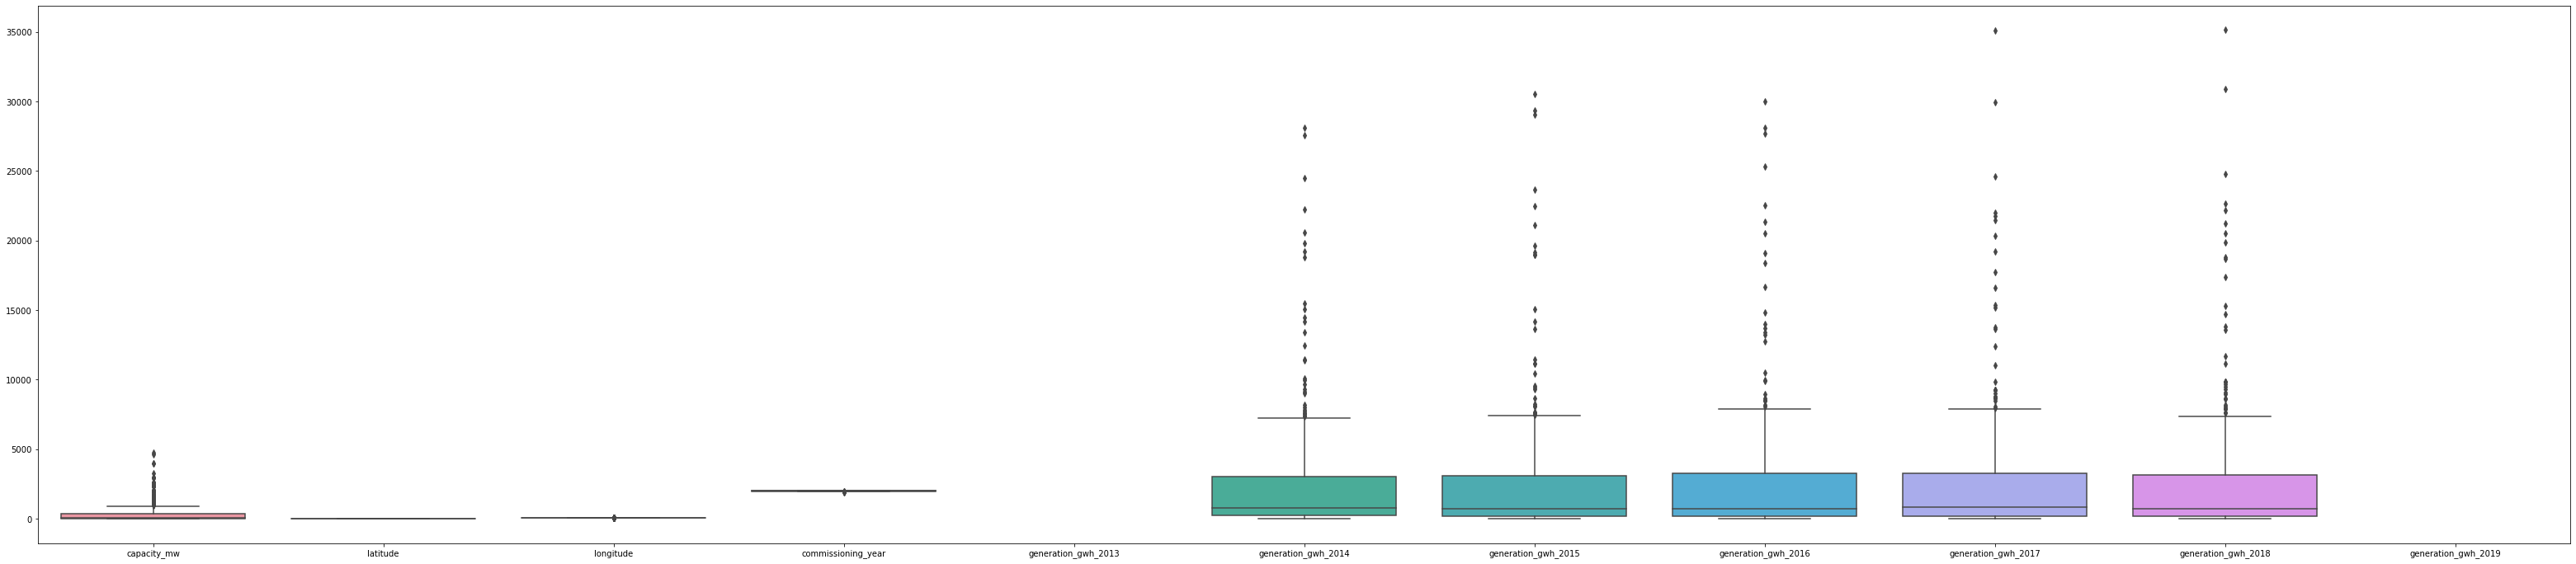

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = data, ax=ax)
plt.show()

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:title={'center':'generation_gwh_2019'}>,
        <AxesSubplot:>]], dtype=object)

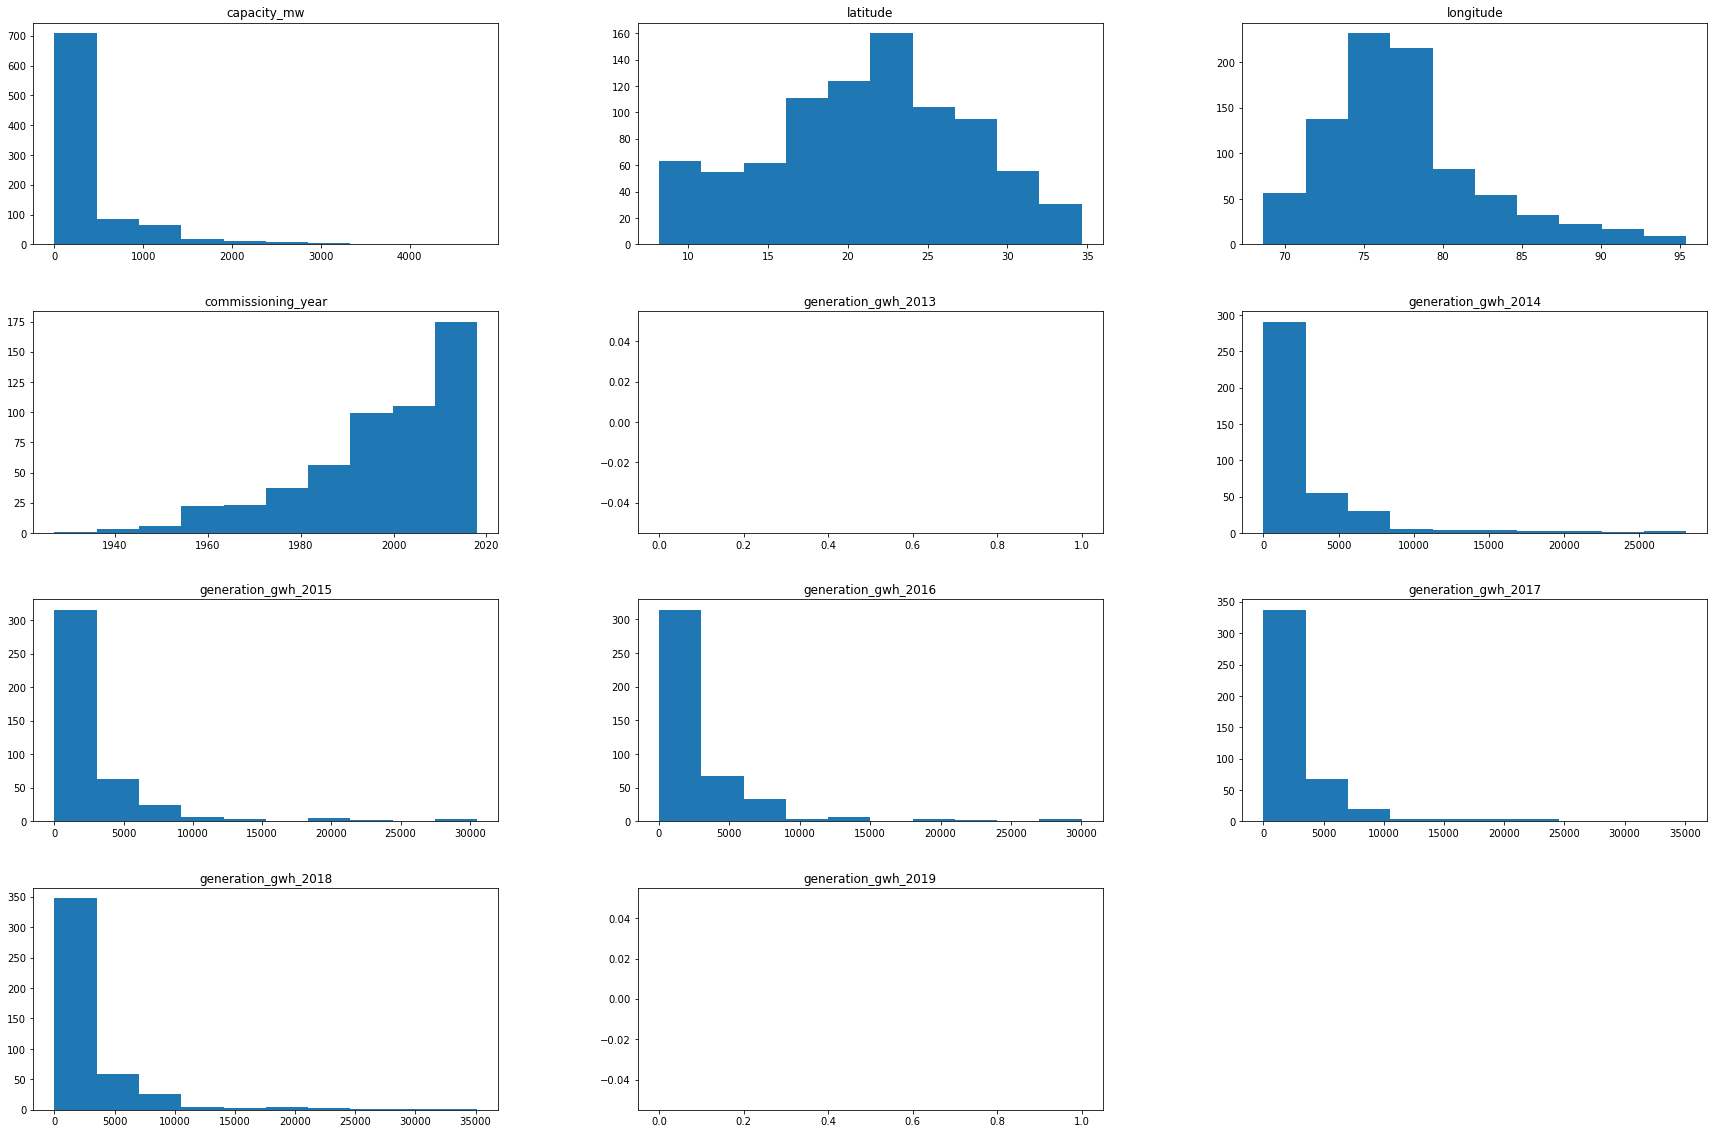

In [23]:
data.hist(figsize = (30,20), grid = False)

<AxesSubplot:>

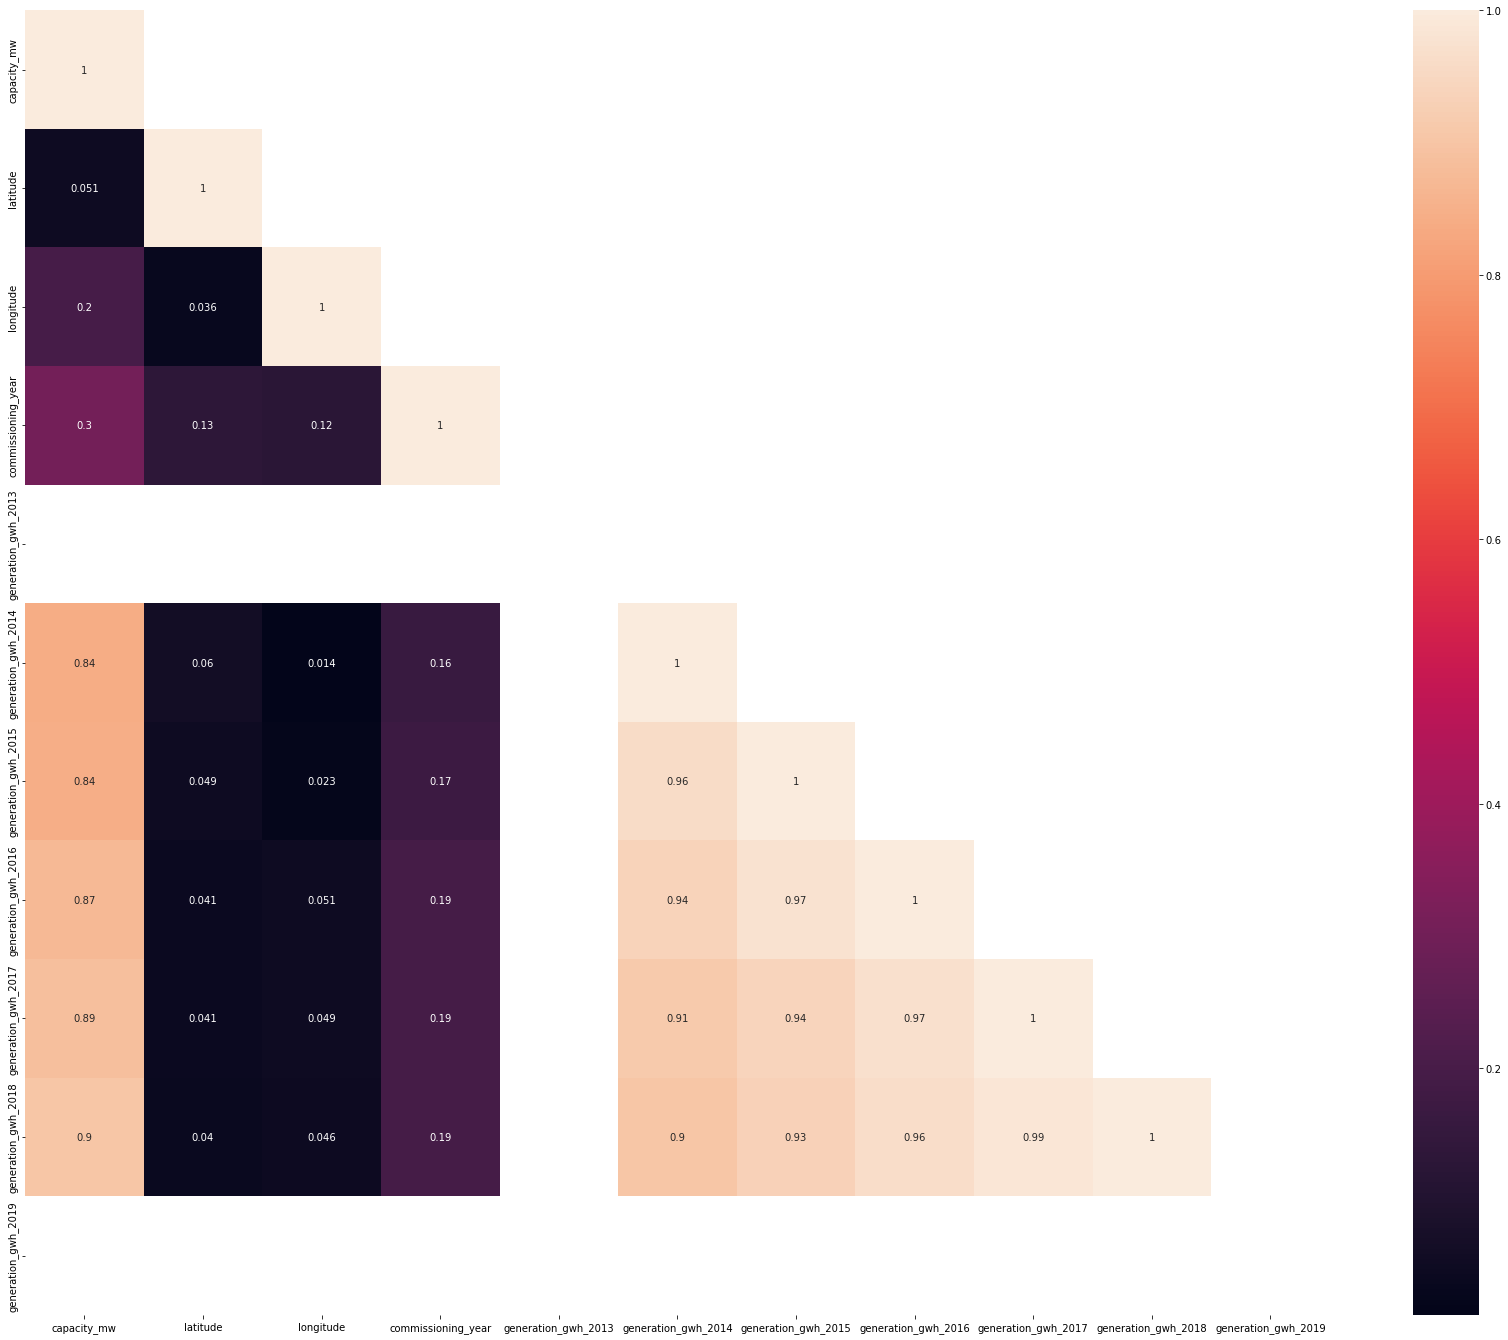

In [24]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

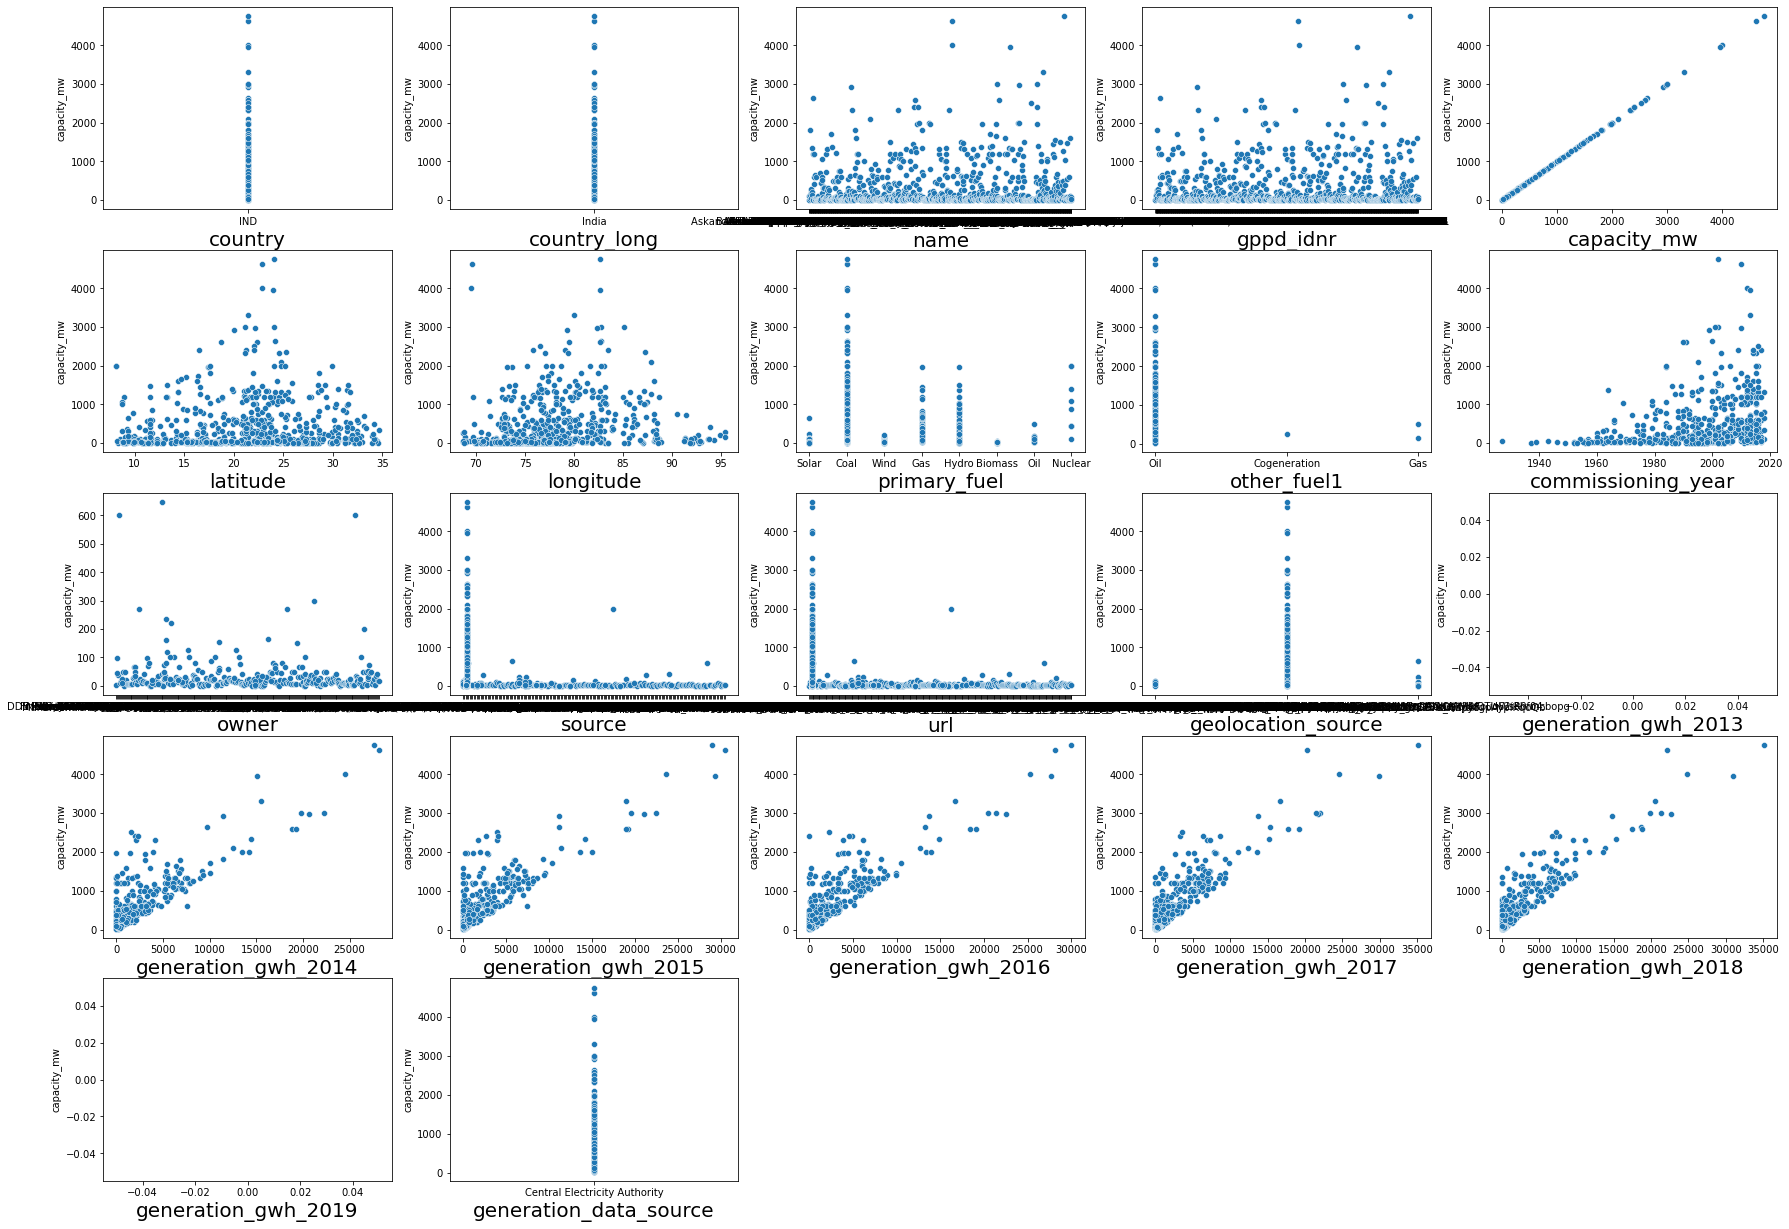

In [26]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'capacity_mw', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1



In [27]:
plt.show()

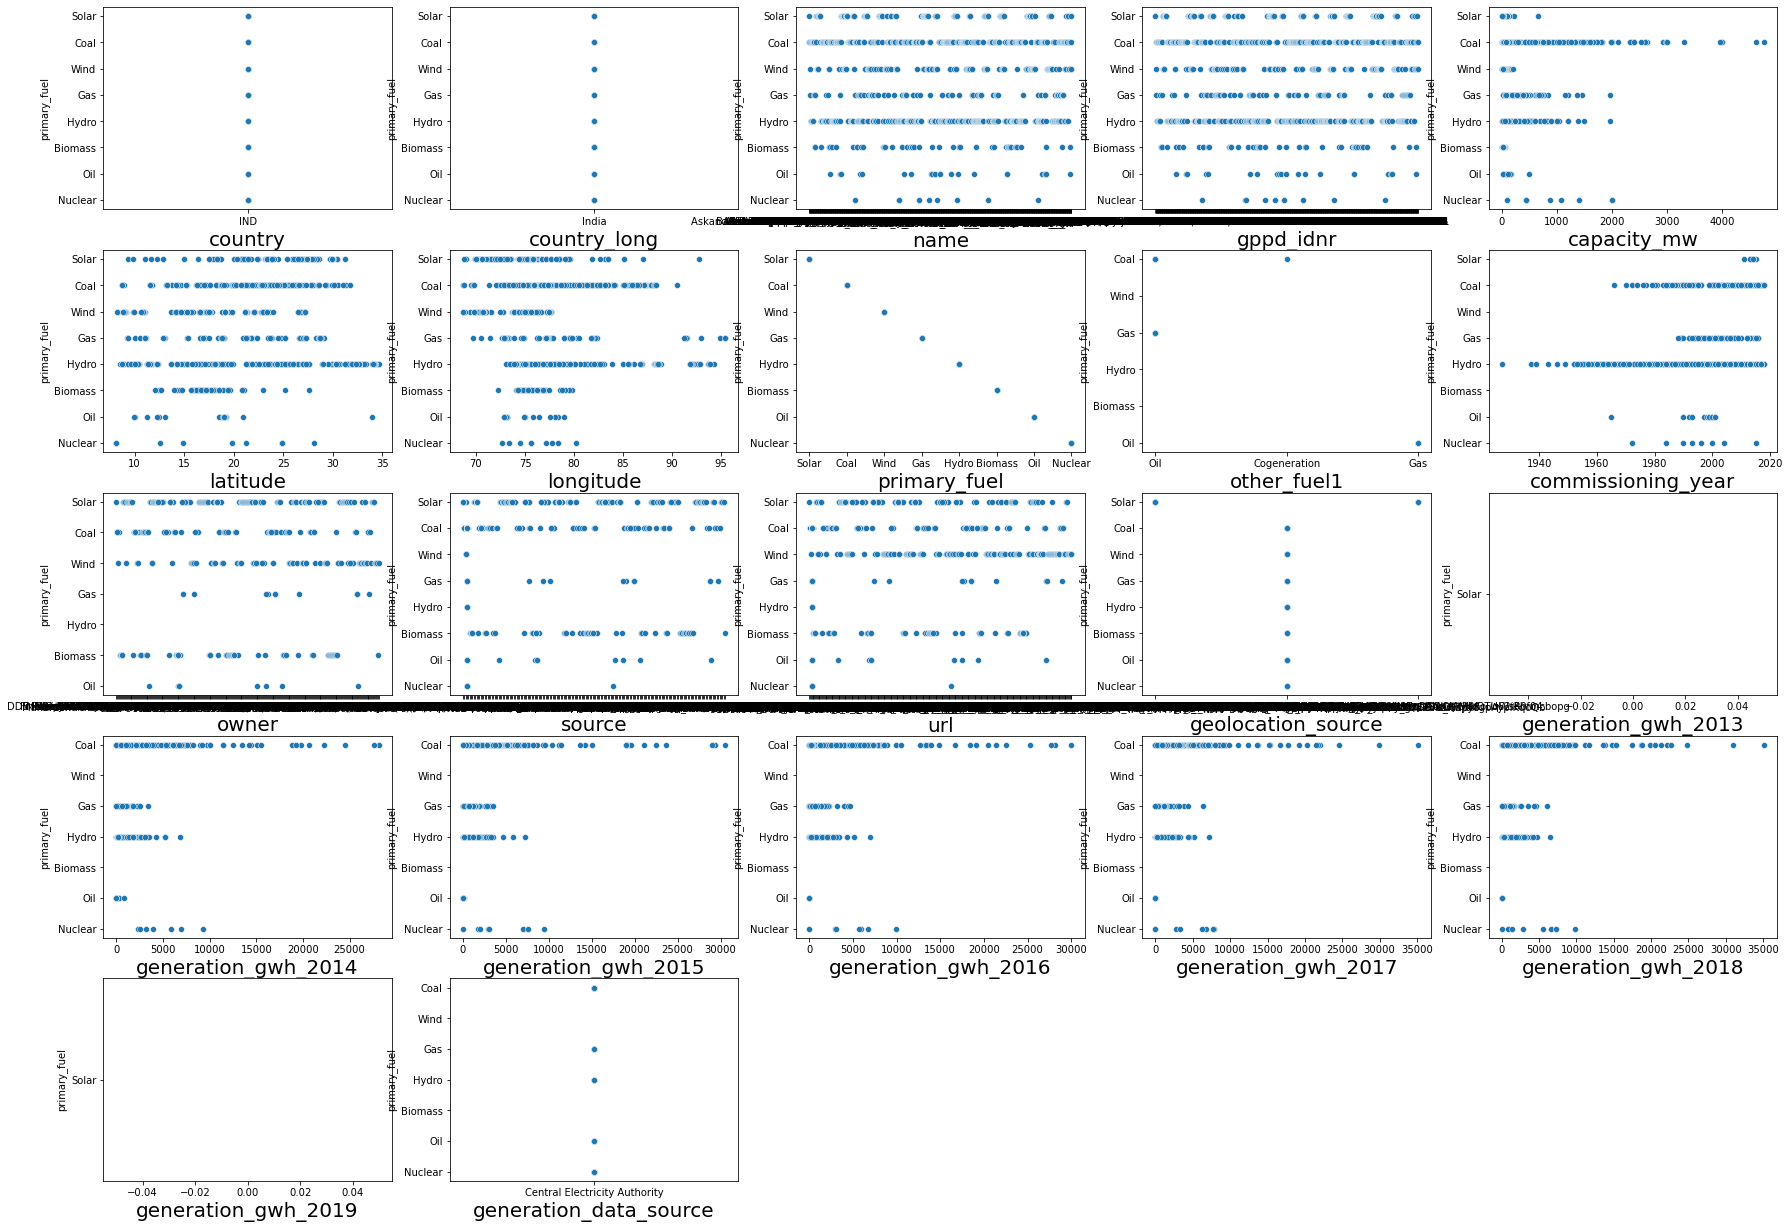

In [29]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'primary_fuel', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1


In [30]:
plt.show()

In [31]:
data.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

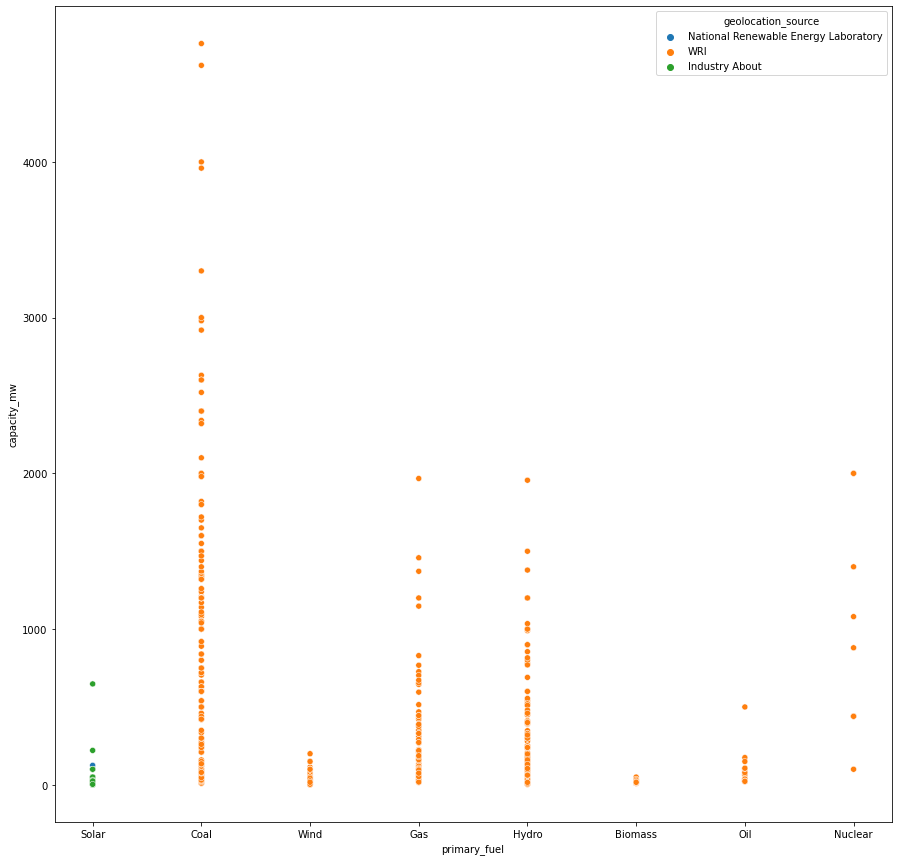

In [32]:
fig,axes=plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=data)

In [33]:
data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [34]:
data.drop(columns = ['generation_data_source'], axis = 1, inplace = True)

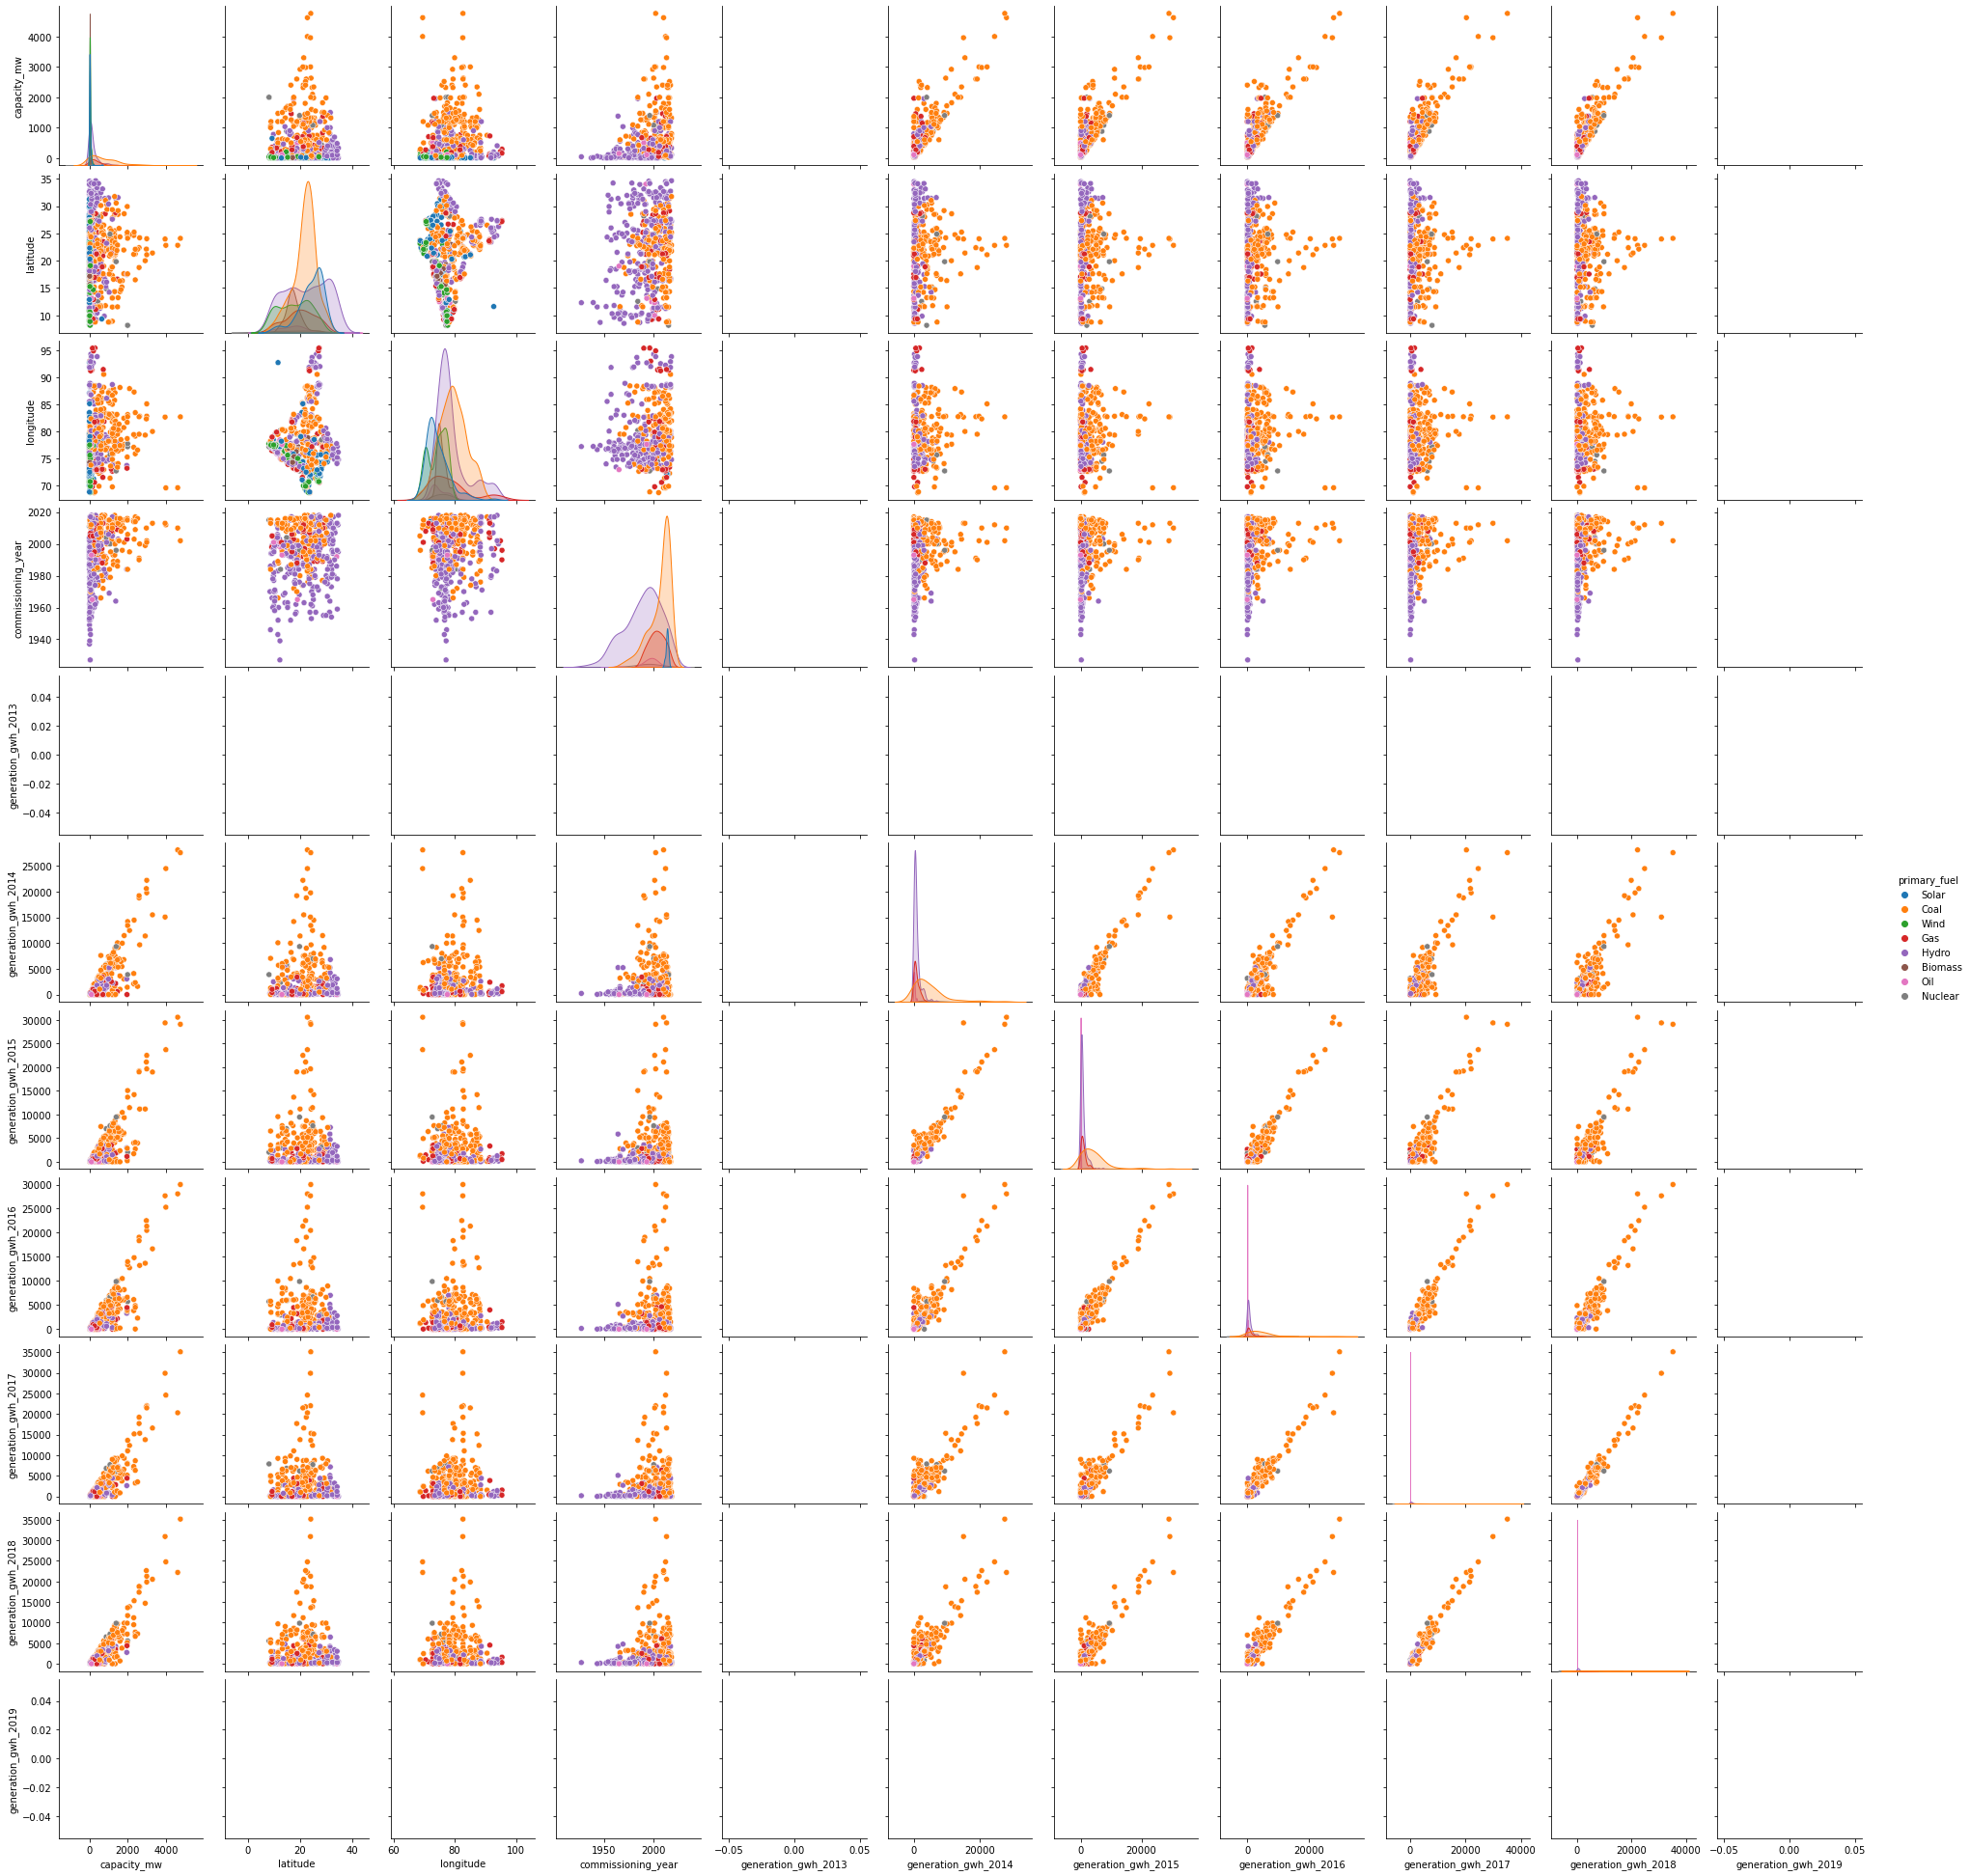

In [35]:
sns.pairplot(data, hue = 'primary_fuel')

In [36]:
#Dealing with null values

from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors = 3)
data_filled = knn_ipm.fit_transform(data[['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017']])

data1 = pd.DataFrame(data_filled)

In [37]:
object_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype) 

Object Data Type Columns are:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source', 'url', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']


In [38]:
# filling missing data for continous values with mean
data["latitude"].fillna(data["latitude"].mean(),inplace=True)
data["longitude"].fillna(data["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
data["commissioning_year"].fillna(data["commissioning_year"].mode()[0],inplace=True)
data["geolocation_source"].fillna(data["geolocation_source"].mode()[0],inplace=True)

In [39]:
data['country'].value_counts()

IND    907
Name: country, dtype: int64

In [40]:
data['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [41]:
data['name'].value_counts()

ACME Solar Tower                                                   1
RAICHUR                                                            1
PRYAGRAJ (BARA) TPP                                                1
PULICHINTALA                                                       1
PUNE MILL                                                          1
PURULIA PSS                                                        1
PYKARA                                                             1
PYKARA ALIMATE                                                     1
Panandhro Solar Power Plant                                        1
Patan Taluka Wind Farm                                             1
Patnaik Hatti Wind Farm                                            1
Patnaik Jamnagar Wind Farm                                         1
Patodi Solar Power Plant                                           1
Phagi Solar Power Plant                                            1
Pokhran FVE Solar Power Plant     

In [42]:
data['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
IND0000347    1
IND0000348    1
IND0000349    1
WRI1026180    1
WRI1026663    1
WRI1026750    1
WRI1026751    1
WRI1026181    1
WRI1026182    1
WRI1026183    1
WRI1026184    1
WRI1026673    1
WRI1026788    1
WRI1026792    1
WRI1026791    1
WRI1026185    1
WRI1026186    1
WRI1026187    1
IND0000350    1
IND0000351    1
WRI1019896    1
IND0000354    1
IND0000345    1
IND0000344    1
IND0000343    1
IND0000329    1
IND0000319    1
IND0000320    1
IND0000321    1
IND0000323    1
IND0000324    1
IND0000325    1
IND0000326    1
WRI1019954    1
IND0000540    1
IND0000327    1
IND0000328    1
WRI1020017    1
IND0000342    1
IND0000330    1
IND0000331    1
IND0000333    1
IND0000334    1
IND0000335    1
IND0000336    1
IND0000337    1
IND0000338    1
IND0000339    1
IND0000340    1
IND0000341    1
IND0000355    1
WRI1019929    1
IND0000534    1
IND0000357    1
IND0000381    1
WRI1026679    1
IND0000352    1
IND00003

In [43]:
data.drop(columns = ['gppd_idnr','name', 'country_long','country'], axis = 1, inplace = True)

In [44]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = data.drop(columns = ['primary_fuel','other_fuel1','owner','source','url','geolocation_source'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (907, 11)
shape after          : (692, 11)
Percentage Loss      : 0.237045203969129


In [45]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [46]:
a = lab_enc.fit_transform(data['primary_fuel'])
b = lab_enc.fit_transform(data['other_fuel1'])
c = lab_enc.fit_transform(data['owner'])
d = lab_enc.fit_transform(data['source'])
e = lab_enc.fit_transform(data['url'])
f = lab_enc.fit_transform(data['geolocation_source'])

In [47]:
data['primary_fuel'] = a
data['other_fuel1'] = b
data['owner'] = c
data['source'] = d
data['url'] = e 
data['geolocation_source'] = f
data

capacity_mw   latitude  longitude  primary_fuel  other_fuel1  \
0          2.500  28.183900  73.240700             6            3   
1         98.000  24.766300  74.609000             1            3   
2         39.200  21.903800  69.373200             7            3   
3        135.000  23.871200  91.360200             2            3   
4       1800.000  21.960300  82.409100             1            2   
5        250.000  23.768900  68.644700             1            2   
6         60.000  10.454700  77.007800             3            3   
7        192.000  32.225800  77.207000             3            3   
8        290.000  16.330000  75.886300             3            3   
9        210.000  23.164200  81.637300             1            2   
10      1350.000  21.078200  77.900900             1            2   
11       134.000  31.271700  76.493800             3            3   
12      1200.000  24.200700  82.800000             1            2   
13        16.950  31.241200  77.876900             3            3   
14         9.000  21.197918  77.464907             3            3   
15      2630.000  24.201000  82.789100             1            2   
16       419.330  25.179700  76.318800             2            3   
17       600.000  23.066600  81.784100             1            3   
18      1200.000  23.065500  81.786500             1            2   
19        10.000  18.084500  76.185100             0            3   
20        17.000  19.586700  74.706100             0            3   
21        24.000  16.770800  74.919100             0            3   
22       652.000  26.628200  79.528600             2            3   
23       600.000  21.743800  83.274100             1            2   
24        46.000  19.788100  79.151800             1            3   
25        50.000  21.197918  77.464907             6            3   
26         1.000  28.361500  74.240200             6            3   
27        16.500  14.575100  76.392600             7            3   
28        50.000  14.945500  77.687000             6            3   
29       113.600  18.858000  73.639600             7            3   
30        19.800  10.724500  77.189300             7            3   
31        13.200  14.479100  76.348200             7            3   
32         5.000  27.347300  71.691700             6            3   
33         5.000  27.360000  71.691800             6            3   
34         5.000  27.363200  71.691800             6            3   
35         5.000  27.366100  71.691600             6            3   
36         5.000  27.353700  71.691700             6            3   
37         5.000  27.350400  71.691800             6            3   
38         5.000  27.356600  71.691700             6            3   
39       705.000  28.506000  77.306600             1            2   
40        28.000  16.280400  75.225000             0            3   
41       450.000  33.181500  75.315500             3            3   
42       450.000  21.197918  77.464907             3            3   
43       180.000  32.806300  76.141800             3            3   
44      1050.000  23.828500  87.451300             1            2   
45       600.000  21.197918  77.464907             1            2   
46       510.000  18.139600  82.122100             3            3   
47        67.500  19.860100  79.342100             1            3   
48        10.000  24.692900  74.689000             1            3   
49       300.000  22.342100  82.430500             1            2   
50       335.000  22.995600  88.404200             1            2   
51        12.000  32.168600  76.469500             3            3   
52       315.000  24.191700  81.287500             3            3   
53        30.000  24.191700  81.287500             3            3   
54        60.000  24.191700  81.287500             3            3   
55        20.000  24.223000  81.274700             3            3   
56        20.000  23.602600  74.256200             1            3   
57 

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>],
       [<AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'owner'}>,
        <AxesSubplot:title={'center':'source'}>],
       [<AxesSubplot:title={'center':'url'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2019'}>,
        <AxesSubplot:>, <AxesSu

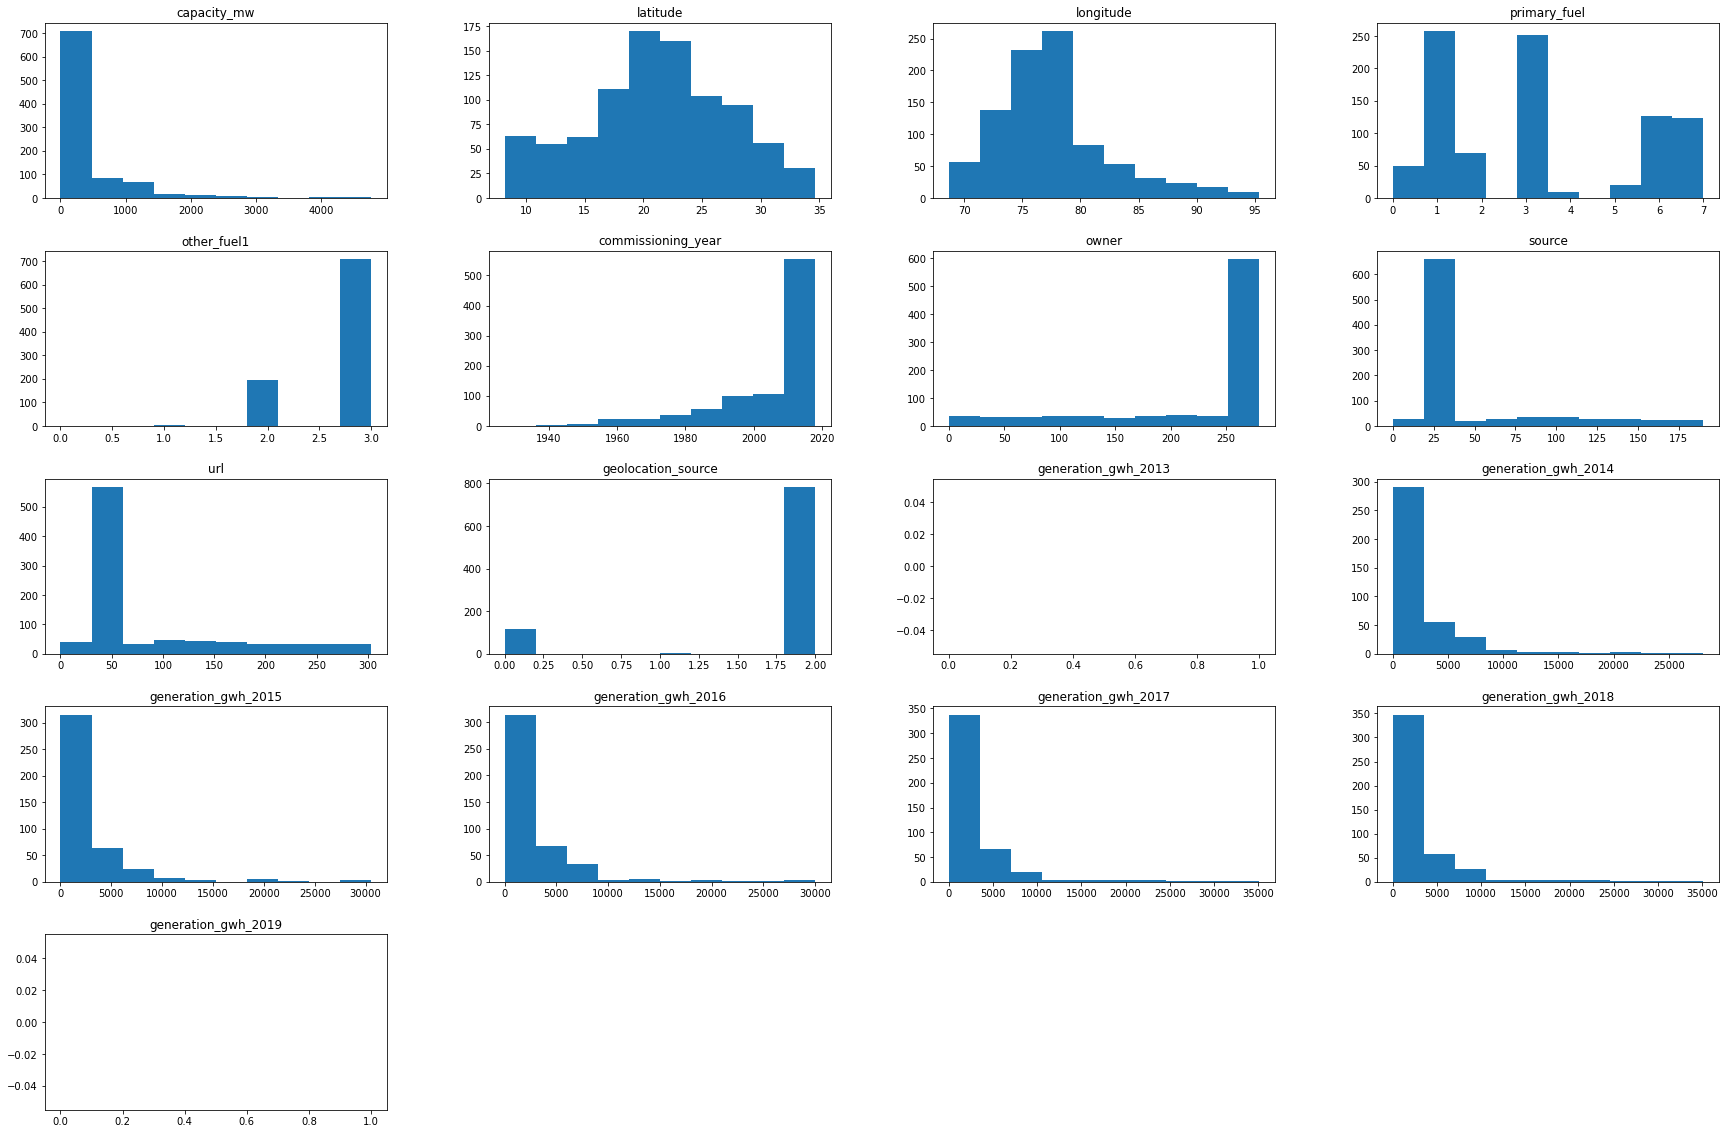

In [48]:
data.hist(figsize = (30,20), grid = False)

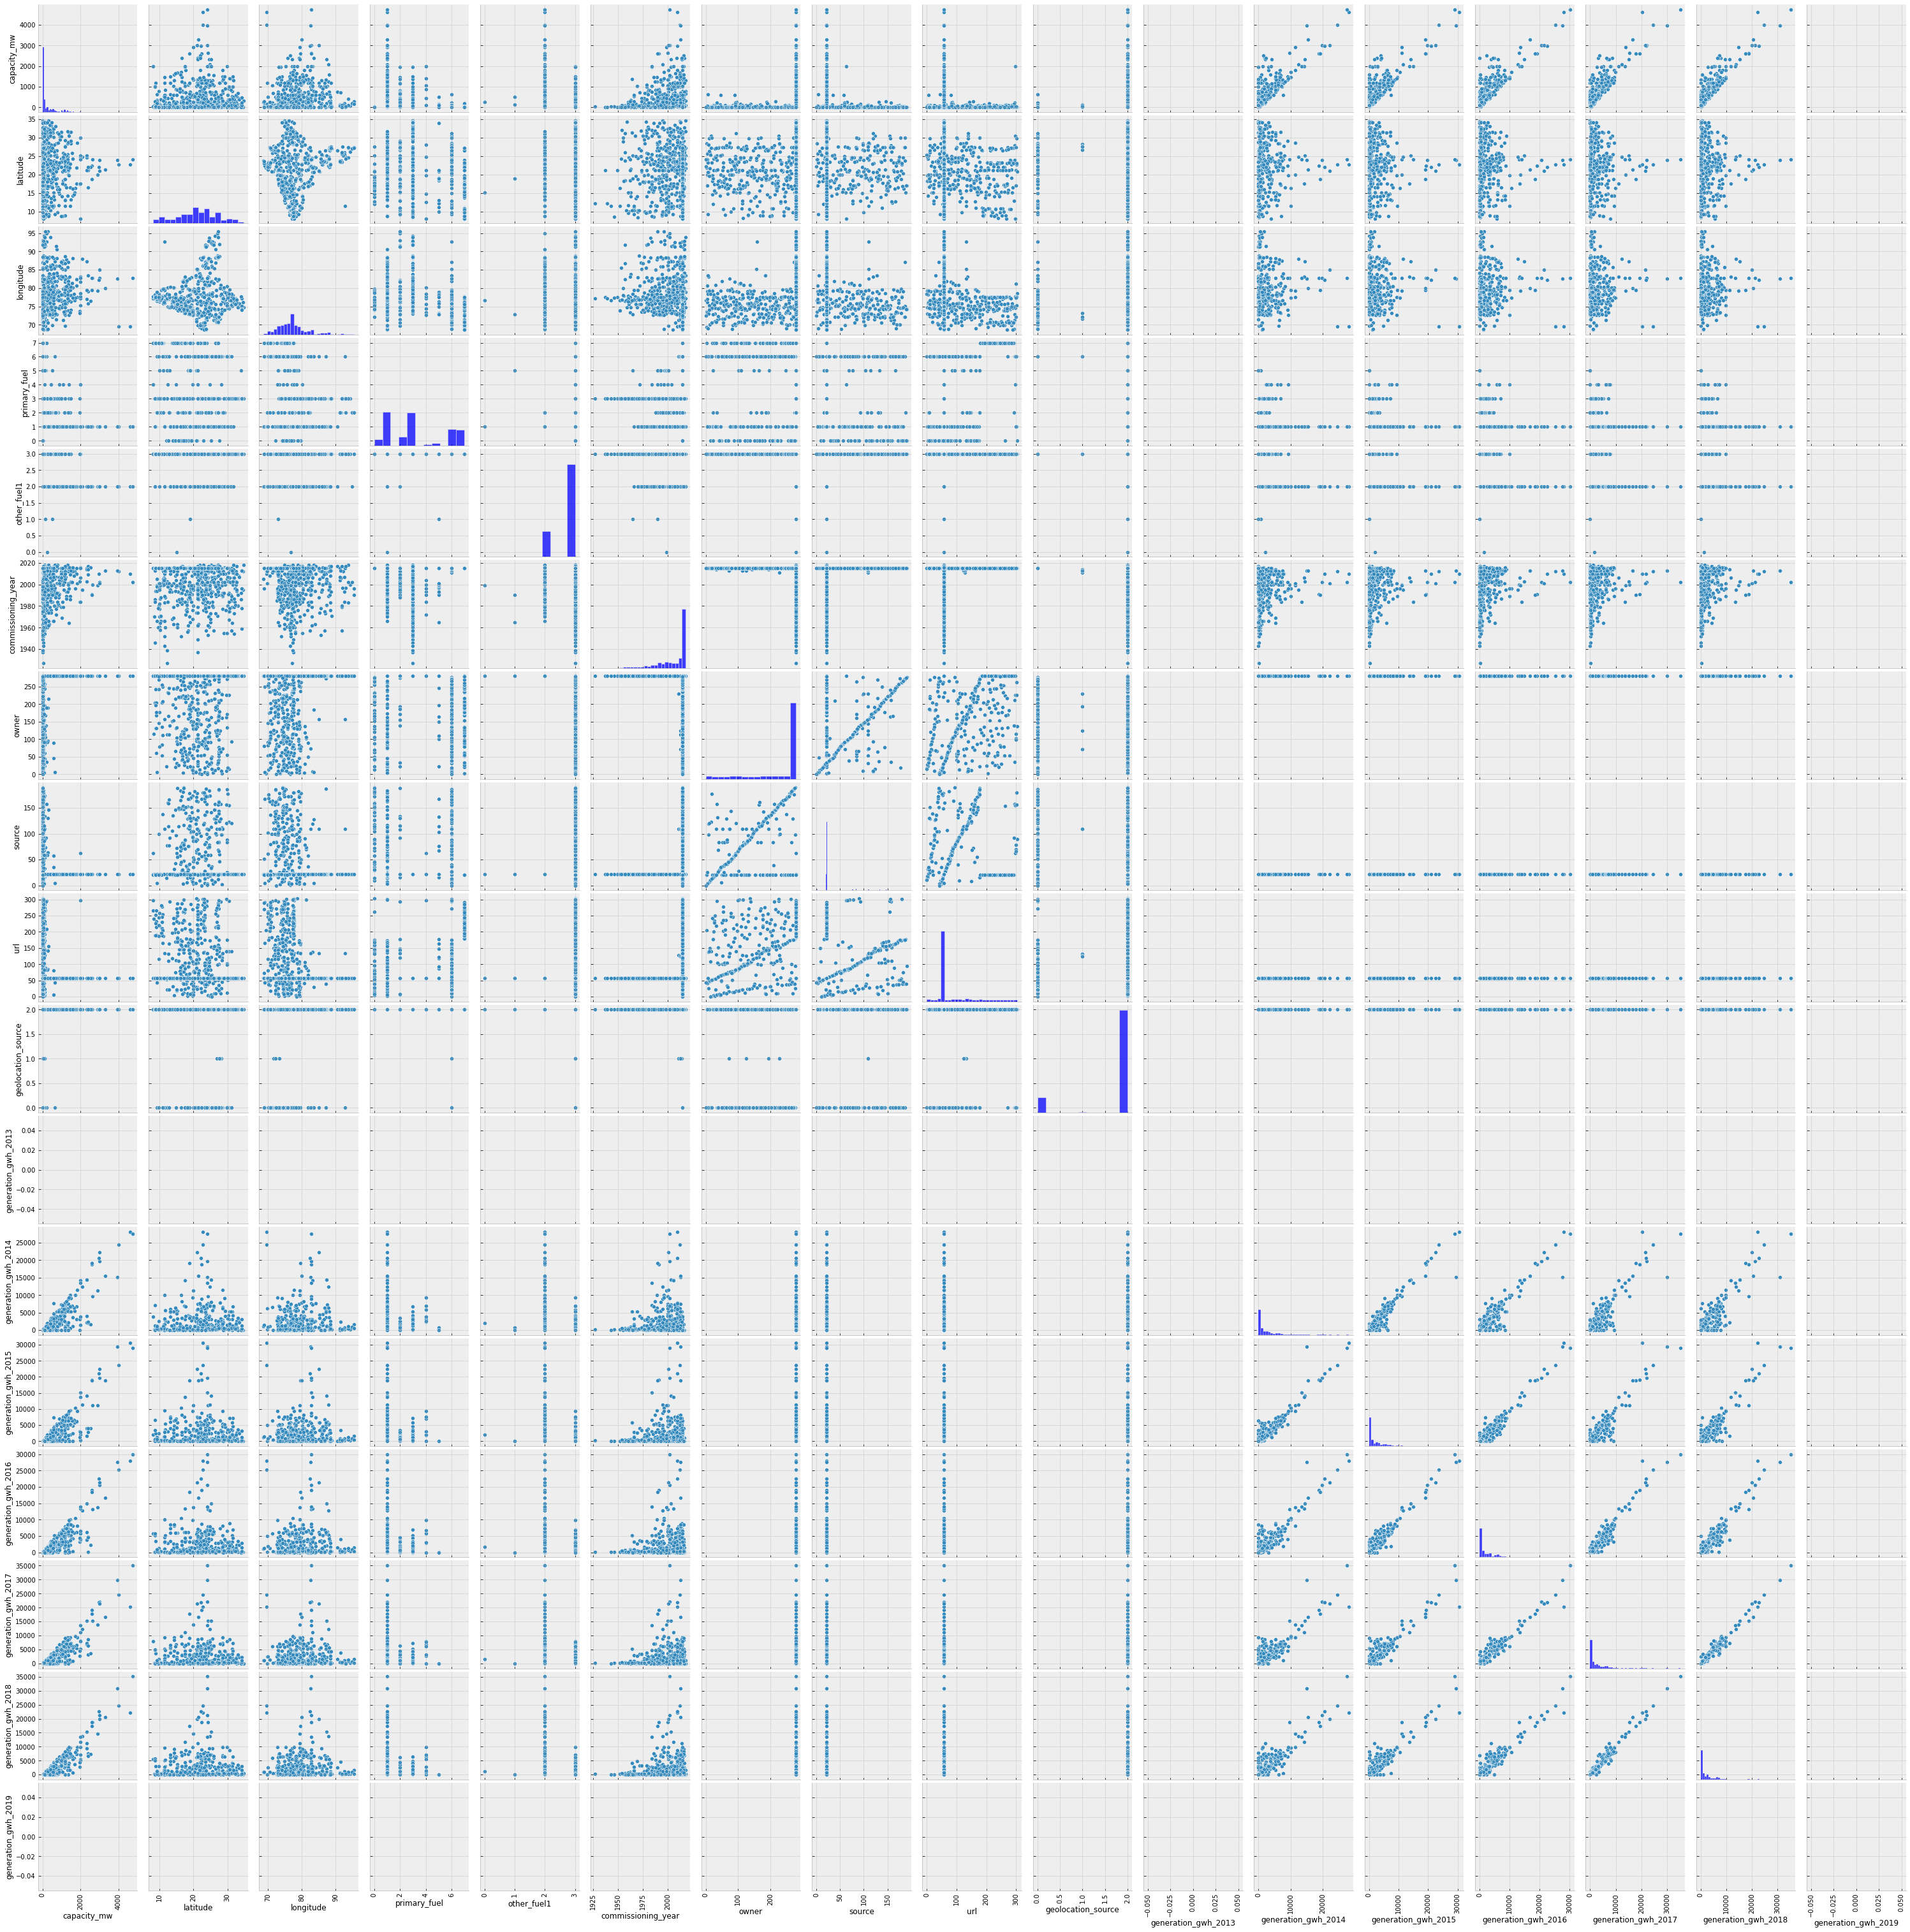

In [49]:
plt.style.use('bmh')
g = sns.pairplot(data)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)


In [50]:
plt.show()

# Model with Target Variable: primary_fuel

In [51]:
y1 = data['primary_fuel']
x1 = data.drop(['primary_fuel'],axis = 1)

In [52]:
le = LabelEncoder()
data["primary_fuel"] = le.fit_transform(data["primary_fuel"])
data.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          2.5   28.1839    73.2407             6            3   
1         98.0   24.7663    74.6090             1            3   
2         39.2   21.9038    69.3732             7            3   
3        135.0   23.8712    91.3602             2            3   
4       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  url  geolocation_source  \
0              2011.0    229     109  128                   1   
1              2015.0    258     174  173                   2   
2              2015.0      2      21  205                   2   
3              2004.0    280      22   58                   2   
4              2015.0    280      22   58                   2   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

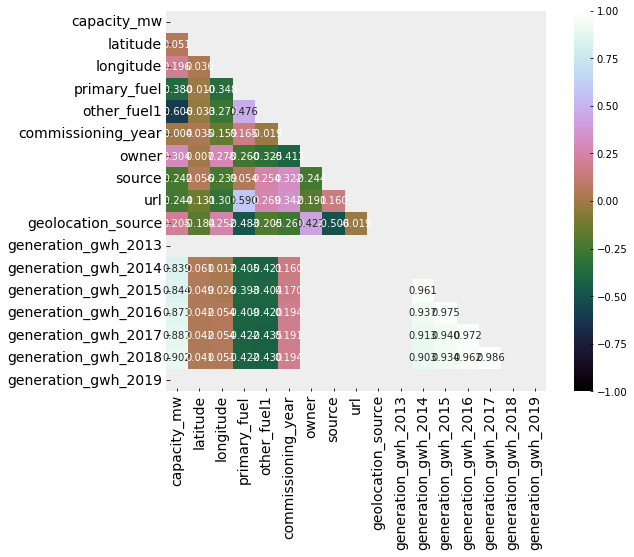

In [53]:
upper_triangle = np.triu(data.corr())
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

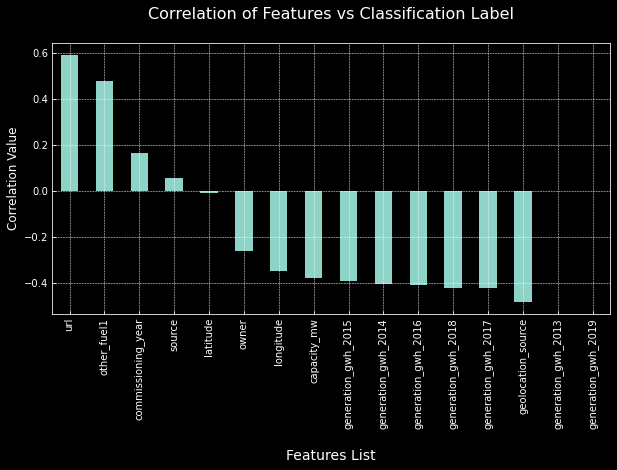

In [54]:
plt.style.use('dark_background')
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

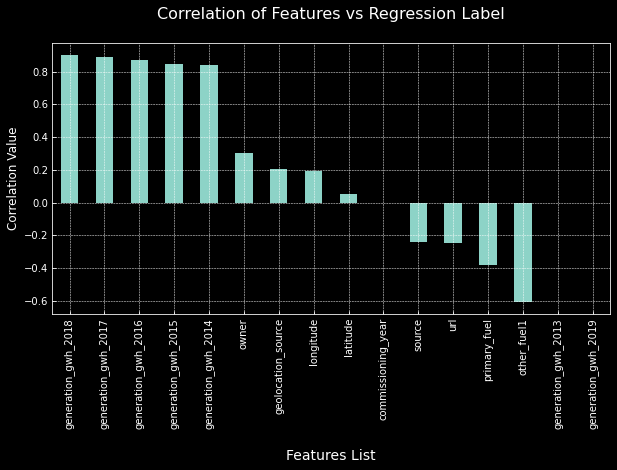

In [55]:
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Using Z Score to remove outliers
#Using Log Transform to fix skewness

In [56]:
for col in float_datatype:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

Converted the data in the series

I have applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [57]:
X = data.drop('primary_fuel', axis=1)
Y = data['primary_fuel']

I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.

# Resolving the class imbalance issue in our label column

In [58]:
Y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Listing the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

# Feature Scaling

In [59]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

capacity_mw  latitude  longitude  other_fuel1  commissioning_year  \
0    -1.628938  1.149805  -0.899131     0.519008            0.407327   
1     0.158583  0.587311  -0.592393     0.519008            0.661679   
2    -0.323415  0.116179  -1.797707     0.519008            0.661679   
3     0.328403  0.439989   2.768797     0.519008           -0.037788   
4     1.710051  0.125479   1.056654    -1.811388            0.661679   

      owner    source       url  geolocation_source  generation_gwh_2013  \
0  0.018166  1.460215  0.476673           -1.083349                  NaN   
1  0.363907  2.917019  1.116401            0.394241                  NaN   
2 -2.688153 -0.512075  1.571318            0.394241                  NaN   
3  0.626193 -0.489662 -0.518459            0.394241                  NaN   
4  0.626193 -0.489662 -0.518459            0.394241                  NaN   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.046691             0.205605             0.216924   
4             0.710879             1.013547             1.025762   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3             0.086986             0.070416                  NaN  
4             0.935281             1.040254                  NaN

# Machine Learning Model for Classification with Evaluation Metrics

In [60]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [61]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

After comparing all the classification models I have selected Extra Trees Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Extra Trees Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model.

In [62]:
X = data.drop('capacity_mw', axis=1)
Y = data['capacity_mw']

In [64]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
0  1.149805  -0.899131      1.225688     0.519008            0.407327   
1  0.587311  -0.592393     -0.967877     0.519008            0.661679   
2  0.116179  -1.797707      1.664401     0.519008            0.661679   
3  0.439989   2.768797     -0.529164     0.519008           -0.037788   
4  0.125479   1.056654     -0.967877    -1.811388            0.661679   

      owner    source       url  geolocation_source  generation_gwh_2013  \
0  0.018166  1.460215  0.476673           -1.083349                  NaN   
1  0.363907  2.917019  1.116401            0.394241                  NaN   
2 -2.688153 -0.512075  1.571318            0.394241                  NaN   
3  0.626193 -0.489662 -0.518459            0.394241                  NaN   
4  0.626193 -0.489662 -0.518459            0.394241                  NaN   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.046691             0.205605             0.216924   
4             0.710879             1.013547             1.025762   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3             0.086986             0.070416                  NaN  
4             0.935281             1.040254                  NaN